In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.shape

(150, 5)

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Sepal Length Distribution')

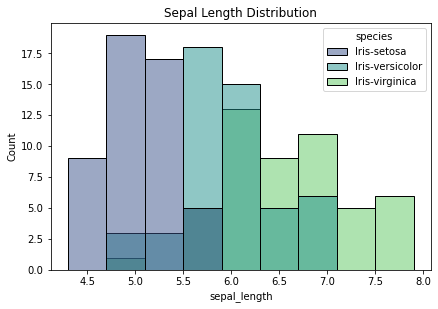

In [12]:
palette = "viridis"

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.histplot(data=df, x="sepal_length", hue="species", palette=palette)
plt.title("Sepal Length Distribution")

Text(0.5, 1.0, 'Sepal Width Distribution')

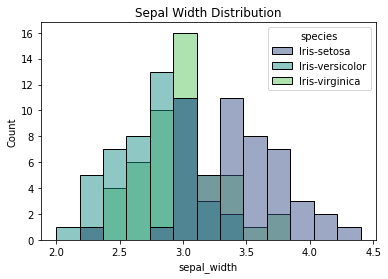

In [13]:
plt.subplot(1, 1, 1)
sns.histplot(data=df, x="sepal_width", hue="species", palette=palette)
plt.title("Sepal Width Distribution")

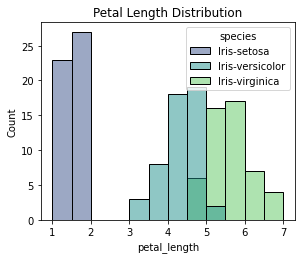

In [14]:
plt.figure(figsize=(10, 8)) 
plt.subplot(2, 2, 3)
sns.histplot(data=df, x="petal_length", hue="species", palette=palette, binwidth=0.5)
plt.title("Petal Length Distribution")
plt.show()

Text(0.5, 1.0, 'Petal Width Distribution')

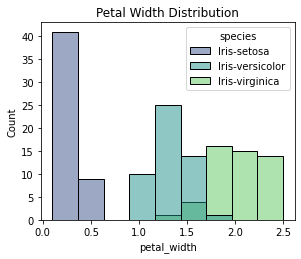

In [15]:
plt.figure(figsize=(10, 8)) 
plt.subplot(2, 2, 4)
sns.histplot(data=df, x="petal_width", hue="species", palette=palette)
plt.title("Petal Width Distribution")

Text(0.5, 1.0, 'Sepal Length Box Plot')

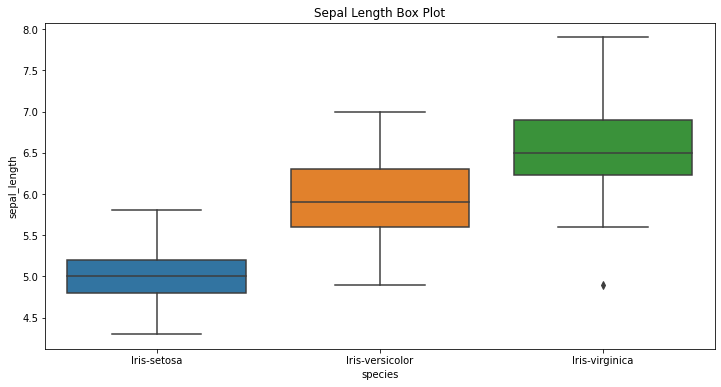

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_length")
plt.title("Sepal Length Box Plot")

Text(0.5, 1.0, 'Sepal Width Box Plot')

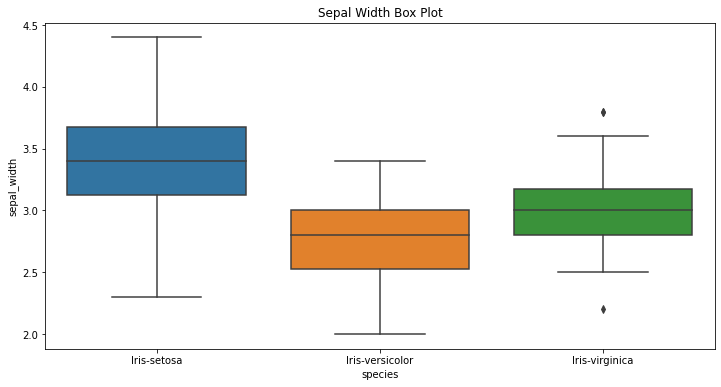

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_width")
plt.title("Sepal Width Box Plot")

Text(0.5, 1.0, 'Petal Length Box Plot')

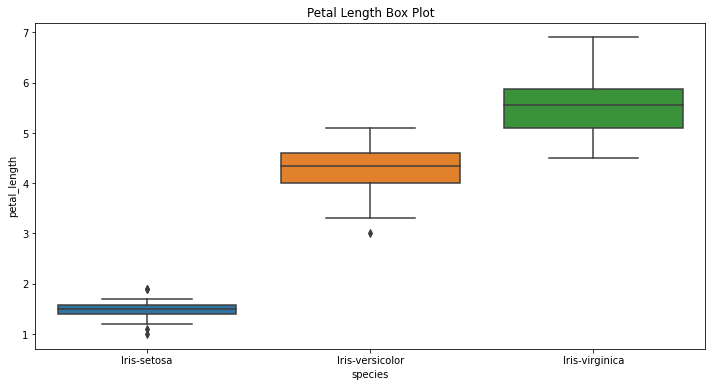

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_length")
plt.title("Petal Length Box Plot")

Text(0.5, 1.0, 'Petal Width Box Plot')

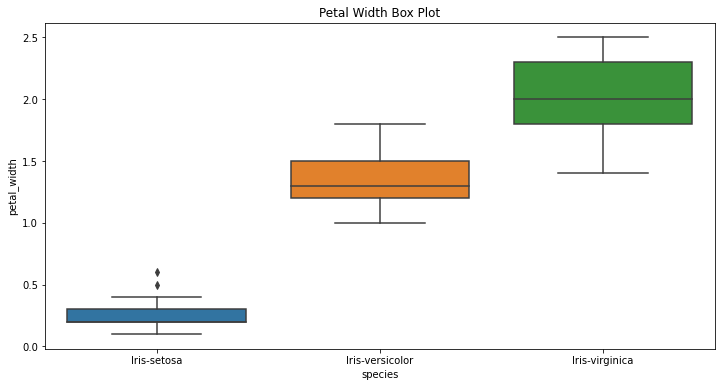

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_width")
plt.title("Petal Width Box Plot")

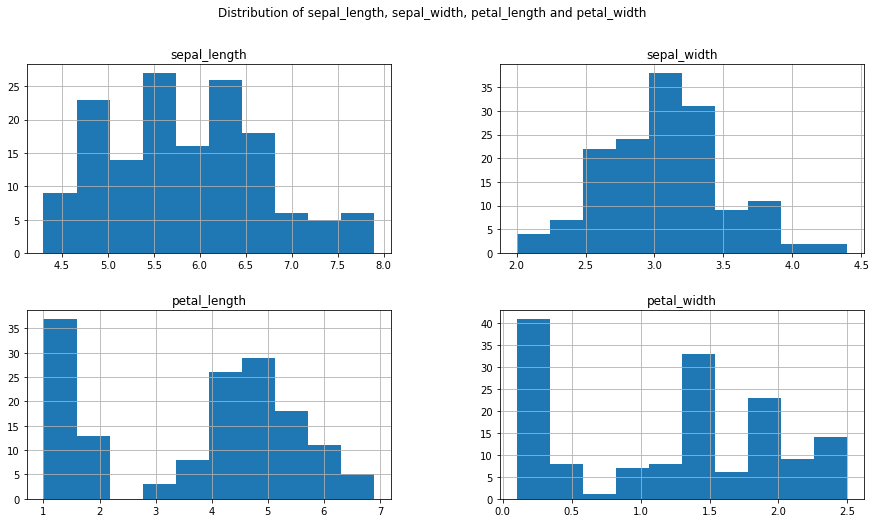

In [20]:
df.hist(figsize=(15,8))
plt.suptitle("Distribution of sepal_length, sepal_width, petal_length and petal_width")
plt.show()

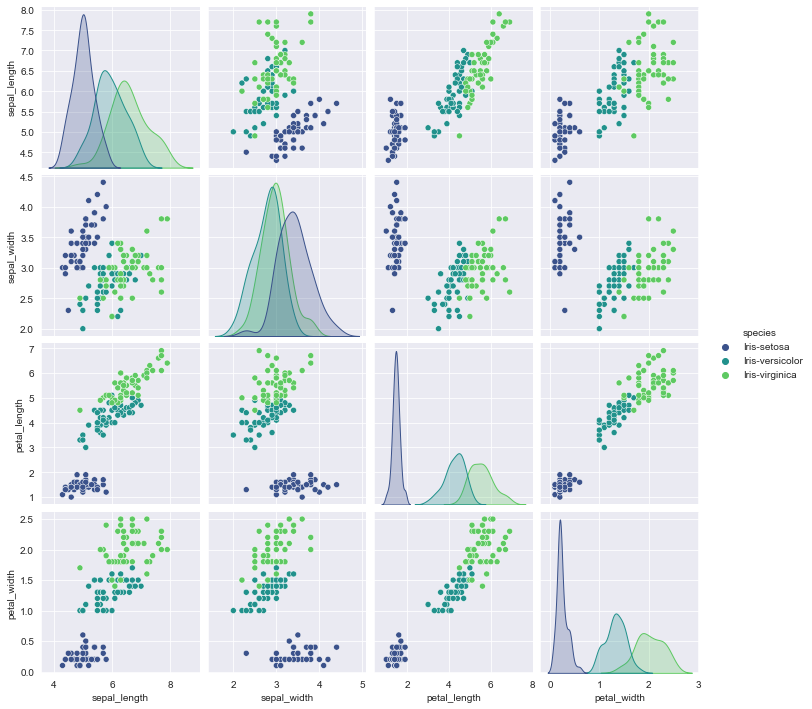

In [21]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='species', palette=palette)
plt.show()

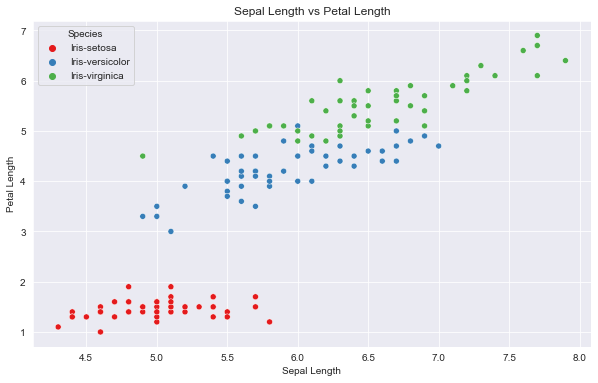

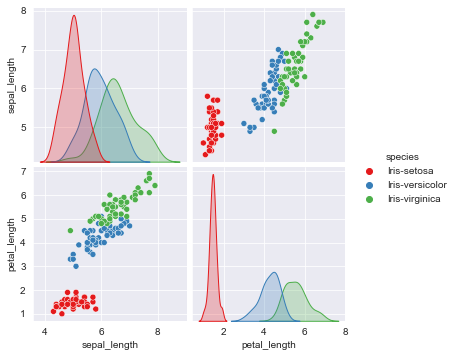

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df, palette='Set1')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species')
plt.show()

sns.pairplot(df, vars=['sepal_length', 'petal_length'], hue='species', palette='Set1')
plt.show()

In [23]:
X = df[['petal_length', 'sepal_length']]  
y = df['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.9555555555555556

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [26]:
def classify_flower(petal_length, sepal_length):
    input_data = [[petal_length, sepal_length]]
    prediction = knn.predict(input_data)
    print(f"The model predicts the species as: {prediction[0]}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")



In [27]:
petal_length = float(input("Enter petal length: "))
sepal_length = float(input("Enter sepal length: "))
classify_flower(petal_length, sepal_length)

Enter petal length: 4
Enter sepal length: 4
The model predicts the species as: Iris-versicolor
Model Accuracy: 95.56%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
X = df[['sepal_length', 'sepal_width','petal_length','petal_width']] 
y = df['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
     

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)
     

Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [31]:
def classify_flower(sepal_length, sepal_width,petal_length,petal_width):
    input_data = [[sepal_length, sepal_width ,petal_length, petal_width]]
    prediction = knn.predict(input_data)
    print(f"The model predicts the species as: {prediction[0]}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [32]:
sepal_length = float(input("Enter petal length: "))
sepal_width = float(input("Enter sepal length: "))
petal_length = float(input("Enter sepal length: "))
petal_width = float(input("Enter sepal length: "))
classify_flower(sepal_length, sepal_width ,petal_length, petal_width)

Enter petal length: 4
Enter sepal length: 3
Enter sepal length: 5
Enter sepal length: 2
The model predicts the species as: Iris-virginica
Model Accuracy: 100.00%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
